## Visualisationen eines Ausschnitts aus den Wetterdaten


Imports


In [1]:
import sys

sys.path.append("../../")

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from src.weatherdata.weather_data import (  # pylint: disable=import-error
    HourlyData, ModelBasedOptions, WeatherData)
from datetime import datetime
import pandas as pd


Daten


In [2]:
latitude = 54.35
longitude = 18.65

# latitude = 52.30
# longitude = 8.91

start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 1, 31)

options = ModelBasedOptions(
    hourly=[
        HourlyData.Temperature_2m,
        HourlyData.RelativeHumidity_2m,
        HourlyData.WindDirection_10m,
        HourlyData.WindSpeed_10m,
        HourlyData.Precipitation_rain_showers_snow,
    ]
)
meta_data_model, daily_model, hourly_model = WeatherData.getModelBasedData(
    latitude, longitude, start_date, end_date, options
)

meta_data_station, daily_station, hourly_station = WeatherData.getStationData(
    latitude, longitude, start_date, end_date, require_daily=False, require_hourly=True, skip_stations=["12150"]
)


In [3]:
meta_data_station.__dict__


{'id': '12155',
 'name': 'Gdansk-Swibno',
 'country': 'PL',
 'region': 'PM',
 'wmo_id': '12155',
 'icao_id': <NA>,
 'latitude': 54.3333,
 'longitude': 18.9333,
 'elevation': 7.0,
 'timezone': 'Europe/Warsaw',
 'hourly_start': Timestamp('1982-09-01 00:00:00'),
 'hourly_end': Timestamp('2023-06-13 00:00:00'),
 'daily_start': Timestamp('2013-01-05 00:00:00'),
 'daily_end': Timestamp('2022-03-31 00:00:00'),
 'monthly_start': Timestamp('1982-01-01 00:00:00'),
 'monthly_end': Timestamp('2021-01-01 00:00:00'),
 'distance': 18457.472008234432}

In [4]:
fig_model = make_subplots(specs=[[{"secondary_y": True}]], column_titles=["Model based weather data"])

fig_model.add_trace(go.Scatter(x=hourly_model.index, y=hourly_model["temperature_2m"], name="Temperature [°C]"))
fig_model.add_trace(
    go.Bar(x=hourly_model.index, y=hourly_model["precipitation"], name="Rain amount [mm]"), secondary_y=True
)


In [5]:
fig_station = make_subplots(specs=[[{"secondary_y": True}]], column_titles=["Station weather data"])

fig_station.add_trace(go.Scatter(x=hourly_station.index, y=hourly_station["temperature_C"], name="Temperature [°C]"))
fig_station.add_trace(
    go.Bar(x=hourly_model.index, y=hourly_station["percipation_mm"], name="Rain amount [mm]"), secondary_y=True
)


In [6]:
fig_compare_distance = make_subplots(
    specs=[[{}]],
    column_titles=[
        f"Comparison station vs model based (distance between points: {meta_data_station.distance/1000:.2f}km)"
    ],
)

fig_compare_distance.add_trace(
    go.Scatter(x=hourly_model.index, y=hourly_model["temperature_2m"], name="Temperature Model [°C]")
)
fig_compare_distance.add_trace(
    go.Scatter(x=hourly_station.index, y=hourly_station["temperature_C"], name="Temperature Station [°C]")
)


In [7]:
options = ModelBasedOptions(
    hourly=[
        HourlyData.Temperature_2m,
        HourlyData.RelativeHumidity_2m,
        HourlyData.WindDirection_10m,
        HourlyData.WindSpeed_10m,
        HourlyData.Precipitation_rain_showers_snow,
    ]
)
meta_data_model_station, daily_model_station, hourly_model_station = WeatherData.getModelBasedData(
    meta_data_station.latitude, meta_data_station.longitude, start_date, end_date, options
)


In [8]:
fig_compare_same_location = make_subplots(
    specs=[[{}]], column_titles=["Comparison station vs model based, same location"]
)
fig_compare_same_location = make_subplots(
    specs=[[{}]], column_titles=["Comparison station vs model based, same location"]
)

fig_compare_same_location.add_trace(
    go.Scatter(x=hourly_model_station.index, y=hourly_model_station["temperature_2m"], name="Temperature Model [°C]")
)
fig_compare_same_location.add_trace(
    go.Scatter(x=hourly_station.index, y=hourly_station["temperature_C"], name="Temperature Station [°C]")
)


In [9]:
fig_compare_same_location = make_subplots(
    specs=[[{}]], column_titles=["Comparison station vs model based, same location"]
)

fig_compare_same_location.add_trace(
    go.Scatter(x=hourly_model_station.index, y=hourly_model_station["winddirection_10m"], name="Temperature Model [°C]")
)
fig_compare_same_location.add_trace(
    go.Scatter(
        x=hourly_station.index,
        y=[abs(val - 360) + 90 for val in hourly_station["wind_direction_degree"]],
        name="Temperature Station [°C]",
    )
)


array([[<Axes: xlabel='temperature_2m', ylabel='temperature_2m'>,
        <Axes: xlabel='relativehumidity_2m', ylabel='temperature_2m'>,
        <Axes: xlabel='winddirection_10m', ylabel='temperature_2m'>,
        <Axes: xlabel='windspeed_10m', ylabel='temperature_2m'>,
        <Axes: xlabel='precipitation', ylabel='temperature_2m'>],
       [<Axes: xlabel='temperature_2m', ylabel='relativehumidity_2m'>,
        <Axes: xlabel='relativehumidity_2m', ylabel='relativehumidity_2m'>,
        <Axes: xlabel='winddirection_10m', ylabel='relativehumidity_2m'>,
        <Axes: xlabel='windspeed_10m', ylabel='relativehumidity_2m'>,
        <Axes: xlabel='precipitation', ylabel='relativehumidity_2m'>],
       [<Axes: xlabel='temperature_2m', ylabel='winddirection_10m'>,
        <Axes: xlabel='relativehumidity_2m', ylabel='winddirection_10m'>,
        <Axes: xlabel='winddirection_10m', ylabel='winddirection_10m'>,
        <Axes: xlabel='windspeed_10m', ylabel='winddirection_10m'>,
        <Axes: xla

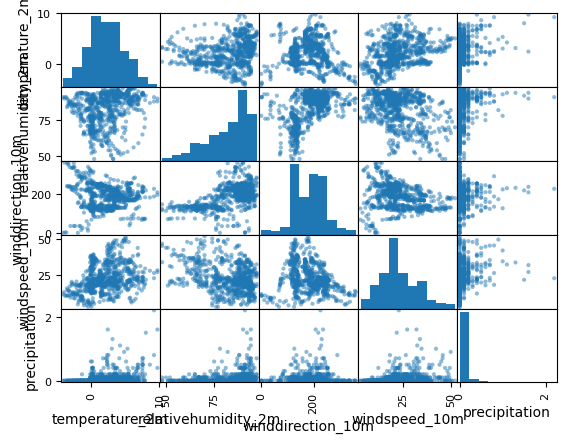

In [11]:
pd.options.plotting.backend = "plotly"
pd.plotting.scatter_matrix(hourly_model_station)
